In [1]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Split proportion & random dataset

In [2]:
results = pd.DataFrame()

for ds_rand in range(0, 101, 10):
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=10, n_redundant=0, random_state=ds_rand)
    for split_prop in np.linspace(0.1,0.5,5):
        for split_rand in range(0,51,10):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_prop, random_state=split_rand)

            model = LogisticRegression(solver='liblinear')
            model_cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'recall')
            model_cv_score_mean = model_cv_scores.mean()
            model_cv_score_std = model_cv_scores.std()

            model.fit(X_train, y_train)

            train_accuracy = accuracy_score(y_train, model.predict(X_train))
            train_recall = recall_score(y_train, model.predict(X_train))
            train_precision = precision_score(y_train, model.predict(X_train))
            train_f1score = f1_score(y_train, model.predict(X_train))

            test_accuracy = accuracy_score(y_test, model.predict(X_test))
            test_recall = recall_score(y_test, model.predict(X_test))
            test_precision = precision_score(y_test, model.predict(X_test))
            test_f1score = f1_score(y_test, model.predict(X_test))
            
            acc_valid = train_accuracy > test_accuracy
            recall_valid = train_recall > test_recall
            precision_valid = train_precision > test_precision
            f1_valid = train_f1score > test_f1score
            
            results = results.append({'dataset_rand_state' : ds_rand, 'split_test_proportion' : split_prop, 'split_rand_state' : split_rand, 'CV_score' : model_cv_score_mean, 'CV_std' : model_cv_score_std, 'train_score' : train_recall, 'test_score' : test_recall, 'acc_valid' : acc_valid, 'recall_valid' : recall_valid, 'precision_valid' : precision_valid, 'f1_valid' : f1_valid}, ignore_index=True)
            
results.head()

,dataset_rand_state,split_test_proportion,split_rand_state,CV_score,CV_std,train_score,test_score,acc_valid,recall_valid,precision_valid,f1_valid
0,0,0.1,0,0.744510,0.011221,0.746063,0.745935,False,True,False,False
1,0,0.1,10,0.745946,0.010038,0.747722,0.749004,False,False,False,False
2,0,0.1,20,0.745288,0.002467,0.747949,0.740816,True,True,True,True
3,0,0.1,30,0.735054,0.015094,0.735727,0.767892,False,False,False,False
4,0,0.1,40,0.741465,0.021995,0.743698,0.733591,True,True,True,True


<AxesSubplot: xlabel='dataset_rand_state', ylabel='recall_valid'>

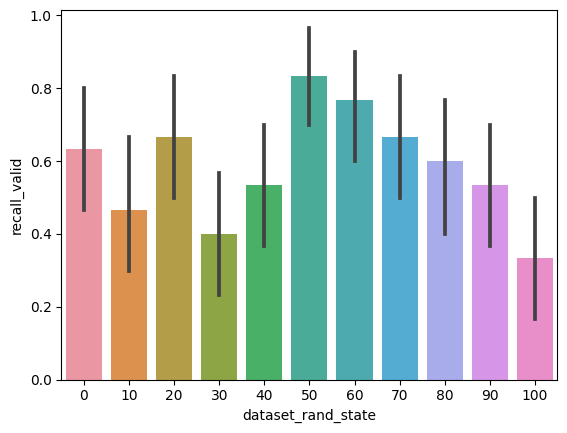

In [3]:
sns.barplot(data=results, x='dataset_rand_state', y = 'recall_valid')

<AxesSubplot: xlabel='split_rand_state', ylabel='recall_valid'>

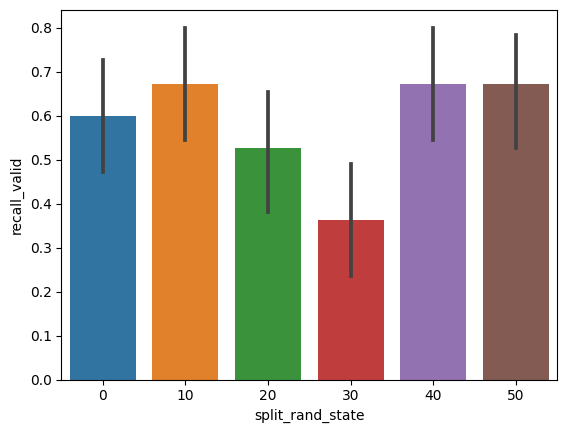

In [4]:
sns.barplot(data=results, x='split_rand_state', y = 'recall_valid')

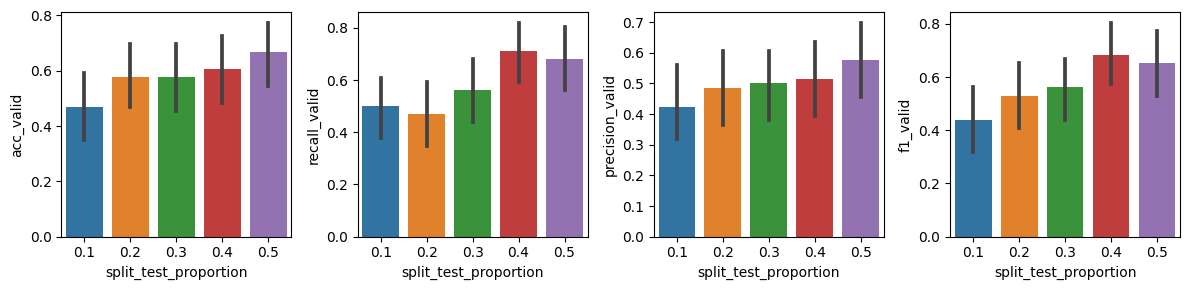

In [5]:
fig, axs = plt.subplots(1,4,figsize=(12,3))

sns.barplot(data=results, x='split_test_proportion', y = 'acc_valid', ax=axs[0])
sns.barplot(data=results, x='split_test_proportion', y = 'recall_valid', ax=axs[1])
sns.barplot(data=results, x='split_test_proportion', y = 'precision_valid', ax=axs[2])
sns.barplot(data=results, x='split_test_proportion', y = 'f1_valid', ax=axs[3])

for i in range(4):
    axs[i].set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])

plt.tight_layout()
plt.show()

In [6]:
df = pd.read_csv('../data/cleaned_heart_data.csv')

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ExerciseAngina_Y,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Oldpeak_is_zero
0,40,140,289.0,0,172,0.0,0,1,0,1,0,0,1,0,0,1,1
1,49,160,180.0,0,156,1.0,1,0,0,0,1,0,1,0,1,0,0
2,37,130,283.0,0,98,0.0,0,1,0,1,0,0,0,1,0,1,1
3,48,138,214.0,0,108,1.5,1,0,1,0,0,0,1,0,1,0,0
4,54,150,195.0,0,122,0.0,0,1,0,0,1,0,1,0,0,1,1


In [7]:
X1 = df.drop('HeartDisease', axis = 1)
y1 = df['HeartDisease']

In [8]:
my_results = pd.DataFrame()

for split_prop in np.linspace(0.1,0.5,5):
    for split_rand in range(0,51,10):
        X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=split_prop, random_state=split_rand)
        
        imputer = SimpleImputer(missing_values=np.nan, strategy='median')
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.fit_transform(X_test)

        model = LogisticRegression(solver='liblinear')
        model_cv_scores = cross_val_score(model, X_train, y_train, cv = 5, scoring = 'recall')
        model_cv_score_mean = model_cv_scores.mean()
        model_cv_score_std = model_cv_scores.std()

        model.fit(X_train, y_train)

        train_accuracy = accuracy_score(y_train, model.predict(X_train))
        train_recall = recall_score(y_train, model.predict(X_train))
        train_precision = precision_score(y_train, model.predict(X_train))
        train_f1score = f1_score(y_train, model.predict(X_train))

        test_accuracy = accuracy_score(y_test, model.predict(X_test))
        test_recall = recall_score(y_test, model.predict(X_test))
        test_precision = precision_score(y_test, model.predict(X_test))
        test_f1score = f1_score(y_test, model.predict(X_test))
        
        acc_valid = train_accuracy > test_accuracy
        recall_valid = train_recall > test_recall
        precision_valid = train_precision > test_precision
        f1_valid = train_f1score > test_f1score
        
        my_results = my_results.append({'split_test_proportion' : split_prop, 'split_rand_state' : split_rand, 'CV_score' : model_cv_score_mean, 'CV_std' : model_cv_score_std, 'train_score' : train_recall, 'test_score' : test_recall, 'acc_valid' : acc_valid, 'recall_valid' : recall_valid, 'precision_valid' : precision_valid, 'f1_valid' : f1_valid}, ignore_index=True)
            
my_results.head()

,split_test_proportion,split_rand_state,CV_score,CV_std,train_score,test_score,acc_valid,recall_valid,precision_valid,f1_valid
0,0.1,0,0.883684,0.028551,0.885965,0.921569,False,False,False,False
1,0.1,10,0.889866,0.012048,0.894273,0.773585,True,True,False,True
2,0.1,20,0.889328,0.033835,0.889381,0.872727,False,True,False,False
3,0.1,30,0.893478,0.024208,0.889130,0.957447,False,False,True,False
4,0.1,40,0.883516,0.047444,0.883516,0.942308,False,False,True,False


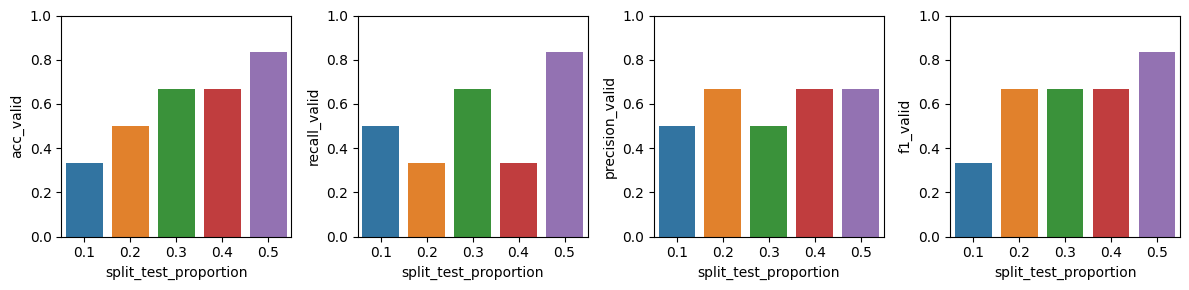

In [9]:
fig, axs = plt.subplots(1,4,figsize=(12,3))

sns.barplot(data=my_results, x='split_test_proportion', y = 'acc_valid', errorbar=None, ax=axs[0])
sns.barplot(data=my_results, x='split_test_proportion', y = 'recall_valid', errorbar=None, ax=axs[1])
sns.barplot(data=my_results, x='split_test_proportion', y = 'precision_valid', errorbar=None, ax=axs[2])
sns.barplot(data=my_results, x='split_test_proportion', y = 'f1_valid', errorbar=None, ax=axs[3])

for i in range(4):
    axs[i].set_xticklabels([0.1, 0.2, 0.3, 0.4, 0.5])
    axs[i].set_ylim(0,1)

plt.tight_layout()
plt.show()

# See how splits are done

In [10]:
results1 = pd.DataFrame()

for rand_state in range(0,101):
    for split_prop1 in np.linspace(0.1,0.5,5):
        X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=split_prop1, random_state=rand_state)
        
        positive_prop_train = y_train1.mean()
        
        positive_prop_test = y_test1.mean()
        
        results1 = results1.append({'rand_state': rand_state, 'split_proportion': split_prop1, 'train_proportion': positive_prop_train, 'test_proportion': positive_prop_test}, ignore_index=True)
    
results1.head()

,rand_state,split_proportion,train_proportion,test_proportion
0,0.0,0.1,0.552727,0.554348
1,0.0,0.2,0.552524,0.554348
2,0.0,0.3,0.549142,0.561594
3,0.0,0.4,0.543636,0.566757
4,0.0,0.5,0.552402,0.553377


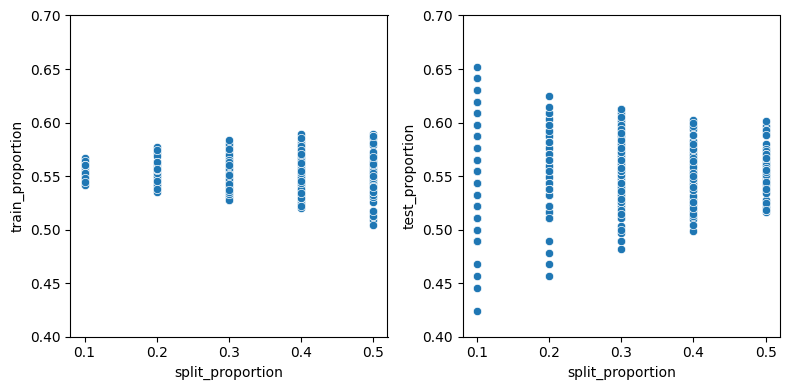

In [11]:
fig, axs = plt.subplots(1,2, figsize=(8,4))
sns.scatterplot(data=results1, x='split_proportion', y='train_proportion', ax=axs[0])
sns.scatterplot(data=results1, x='split_proportion', y='test_proportion', ax=axs[1])

axs[0].set_ylim(0.4,0.7)
axs[1].set_ylim(0.4,0.7)

plt.tight_layout()
plt.show()